In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
from glob import glob
import json
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
experiments = ['PTB_Auto_Run2', 'PTB_Gold_Run2', 'UD1_Auto_Run2', 'UD1_Gold_Run2']

In [3]:
FEATNAMEPATH = '../02_output/en/'
dfs = [] # using this so we can access variables from globals

for exp in experiments:
    __datalist = glob('results/{}_L_16*'.format(exp))
    __featlist = glob(FEATNAMEPATH+exp+'/Li_etal16/*.json')
    if not __featlist:  # slight issue with folder naming convention further upstream
        __featlist = glob(FEATNAMEPATH+exp+'/Li_etal16_UD1/*.json')

    
    for set_ in ['train', 'test']:

        y_fn = [i for i in __datalist if "y_{}.".format(set_) in i][0]
        y_pred_fn = [i for i in __datalist if "y_{}_".format(set_) in i][0]        
        col_fn = [i for i in __featlist if set_ in i][0]   
        cstring = [i for i in __datalist if "cstring_"+set_ in i][0]
        
        print(y_fn)
        print(y_pred_fn)
        print(cstring, '\n')

        # load the y and y_pred labels
        y_labels = np.load(y_fn)
        y_pred_labels = np.load(y_pred_fn)
        
        # load the connective strings
        with open (cstring) as f:
            cstrings = [i.strip('\n') for i in f.readlines()]
        
        results = pd.DataFrame(cstrings, columns = ['cstring'])
        results = results.join(pd.DataFrame(y_labels, columns=['y_labels']), how='left')
        results = results.join(pd.DataFrame(y_pred_labels, columns=['y_pred_labels']), how='left')

        globals()['df_' + exp + '_' + set_] = results.copy()
        dfs.append('df_' + exp + '_' + set_)

results/PTB_Auto_Run2_L_16_y_train.npy
results/PTB_Auto_Run2_L_16_y_train_pred.npy
results/PTB_Auto_Run2_L_16_cstring_train.txt 

results/PTB_Auto_Run2_L_16_y_test.npy
results/PTB_Auto_Run2_L_16_y_test_pred.npy
results/PTB_Auto_Run2_L_16_cstring_test.txt 

results/PTB_Gold_Run2_L_16_y_train.npy
results/PTB_Gold_Run2_L_16_y_train_pred.npy
results/PTB_Gold_Run2_L_16_cstring_train.txt 

results/PTB_Gold_Run2_L_16_y_test.npy
results/PTB_Gold_Run2_L_16_y_test_pred.npy
results/PTB_Gold_Run2_L_16_cstring_test.txt 

results/UD1_Auto_Run2_L_16_y_train.npy
results/UD1_Auto_Run2_L_16_y_train_pred.npy
results/UD1_Auto_Run2_L_16_cstring_train.txt 

results/UD1_Auto_Run2_L_16_y_test.npy
results/UD1_Auto_Run2_L_16_y_test_pred.npy
results/UD1_Auto_Run2_L_16_cstring_test.txt 

results/UD1_Gold_Run2_L_16_y_train.npy
results/UD1_Gold_Run2_L_16_y_train_pred.npy
results/UD1_Gold_Run2_L_16_cstring_train.txt 

results/UD1_Gold_Run2_L_16_y_test.npy
results/UD1_Gold_Run2_L_16_y_test_pred.npy
results/UD1_Gold_R

### Let's do some error analysis

In [4]:
dfs

['df_PTB_Auto_Run2_train',
 'df_PTB_Auto_Run2_test',
 'df_PTB_Gold_Run2_train',
 'df_PTB_Gold_Run2_test',
 'df_UD1_Auto_Run2_train',
 'df_UD1_Auto_Run2_test',
 'df_UD1_Gold_Run2_train',
 'df_UD1_Gold_Run2_test']

In [6]:
for dfvarname in dfs:
    # access from globals()
    __ = globals()[dfvarname]
    # new column that is a sum of y_labels and y_pred_labels, which are one hot encoded
    __['correct'] = __['y_labels'] + __['y_pred_labels']
    # correct if both of them match. i.e. value of 'correct' column != 1, that is they are either 0 or 2
    __['correct'] = __['correct'].apply(lambda x: 'wrong' if x==1 else 'correct')
    
    varname = 'ctr_' + dfvarname.lstrip('df_')
    globals()[varname] = Counter(__[__['correct']=='wrong']['cstring'])
    
    print(varname)
    print( globals()[varname], '\n')
    

ctr_PTB_Auto_Run2_train
Counter({'and': 518, 'as': 119, 'but': 106, 'after': 46, 'when': 46, 'if': 40, 'also': 25, 'since': 23, 'before': 19, 'while': 17, 'or': 16, 'for example': 13, 'then': 12, 'still': 11, 'so': 9, 'until': 9, 'though': 8, 'however': 7, 'previously': 7, 'overall': 6, 'in fact': 5, 'ultimately': 5, 'in the end': 4, 'for': 3, 'even if': 3, 'finally': 3, 'indeed': 2, 'for instance': 2, 'moreover': 1, 'particularly since': 1, 'by contrast': 1, 'a few months after': 1, 'only after': 1, 'accordingly': 1, 'in particular': 1, 'a decade before': 1, 'furthermore': 1, 'within minutes after': 1, 'shortly after': 1, 'much as': 1, 'ever since': 1, 'even as': 1, 'afterward': 1, 'meanwhile': 1, 'further': 1, 'two days after': 1, 'yet': 1, 'shortly before': 1}) 

ctr_PTB_Auto_Run2_test
Counter({'and': 63, 'as': 30, 'if': 16, 'but': 13, 'after': 12, 'when': 11, 'before': 7, 'because': 5, 'still': 5, 'so': 5, 'once': 4, 'while': 4, 'also': 4, 'since': 3, 'until': 3, 'previously': 3, '

### Let's plot some figures 

In [ ]:
ctr_PTB_Gold_Run2_test

In [ ]:
ctr_UD1_Gold_Run2_test

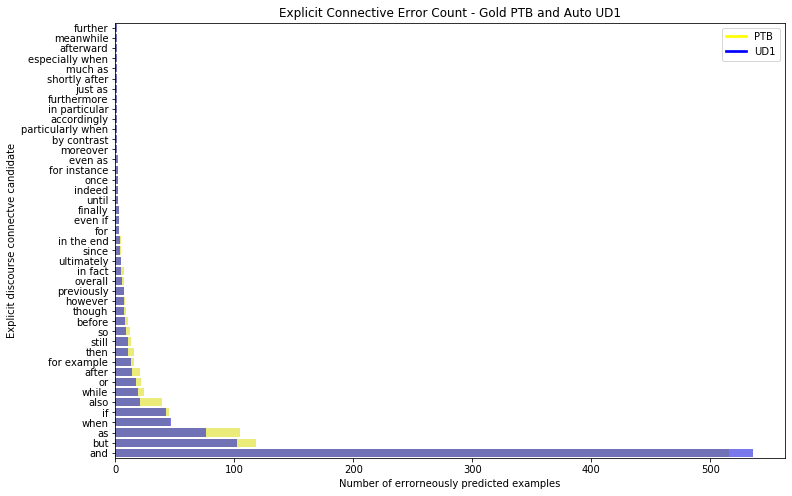

In [60]:
plt.figure(figsize=(12,8)) 
plt.title('Explicit Connective Error Count - Gold PTB and Auto UD1')
plt.xlabel('Number of errorneously predicted examples')
plt.ylabel('Explicit discourse connectve candidate')

N=None
# set #1
most_common_set1 = ctr_PTB_Gold_Run2_train.most_common(N)
plot1 = sns.barplot(x = [i[1] for i in most_common_set1], 
            y = [i[0] for i in most_common_set1], 
            color='yellow', alpha=0.6)

# set #2
most_common_set2 = ctr_UD1_Auto_Run2_train.most_common(N)
plot2 = sns.barplot(x = [i[1] for i in most_common_set2], 
            y = [i[0] for i in most_common_set2], 
            color='blue', alpha = 0.6)
plot2.invert_yaxis()

plt.legend(['PTB', 'UD1'])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('yellow')
leg.legendHandles[1].set_color('blue')


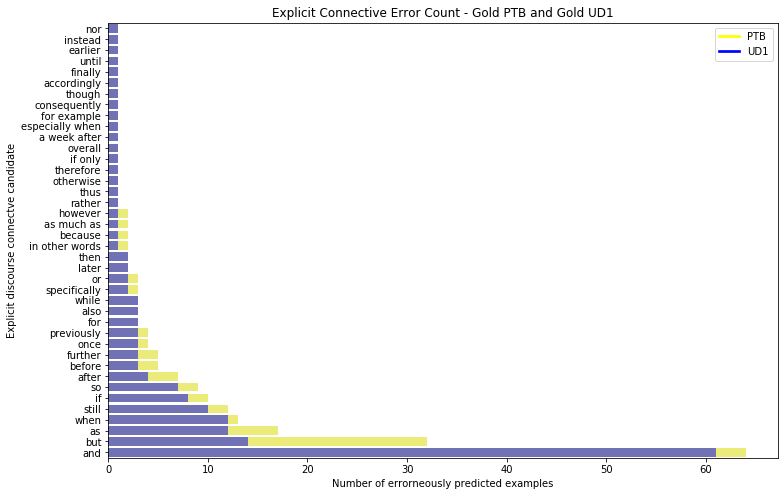

In [61]:
plt.figure(figsize=(12,8)) 
plt.title('Explicit Connective Error Count - Gold PTB and Gold UD1')
plt.xlabel('Number of errorneously predicted examples')
plt.ylabel('Explicit discourse connectve candidate')

N=None
# set #1
most_common_set1 = ctr_PTB_Gold_Run2_test.most_common(N)
plot1 = sns.barplot(x = [i[1] for i in most_common_set1], 
            y = [i[0] for i in most_common_set1], 
            color='yellow', alpha=0.6)

# set #2
most_common_set2 = ctr_UD1_Gold_Run2_test.most_common(N)
plot2 = sns.barplot(x = [i[1] for i in most_common_set2], 
            y = [i[0] for i in most_common_set2], 
            color='blue', alpha = 0.6)
plot2.invert_yaxis()

plt.legend(['PTB', 'UD1'])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('yellow')
leg.legendHandles[1].set_color('blue')


In [53]:
a1 = set([i[0] for i in ctr_PTB_Gold_Run2_test.most_common(N)])
b1 = set([i[0] for i in ctr_UD1_Gold_Run2_test.most_common(N)])


a2 = set([i[0] for i in ctr_PTB_Auto_Run2_test.most_common(N)])
b2 = set([i[0] for i in ctr_UD1_Auto_Run2_test.most_common(N)])



In [54]:
all1 = a1.union(b1)
all2 = a2.union(b2)

In [56]:
all1.difference(all2)

{'for', 'if only', 'if then'}

In [57]:
all2.difference(all1)

{'as a result', 'as soon as'}

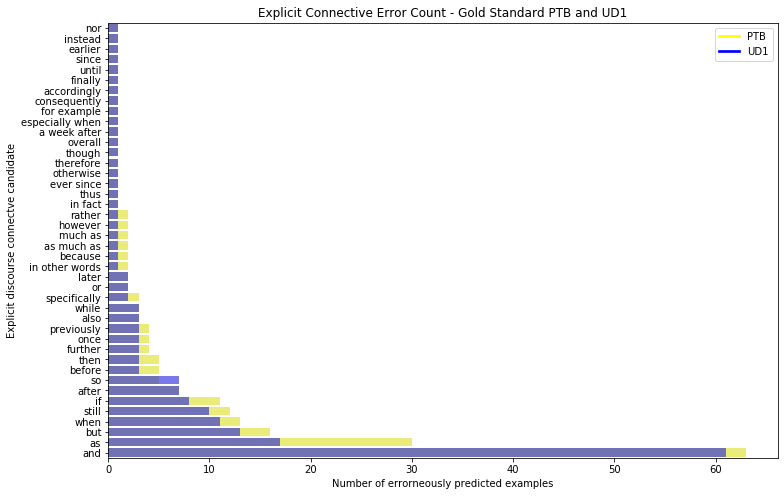

In [36]:
plt.figure(figsize=(12,8)) 
plt.title('Explicit Connective Error Count - Gold Standard PTB and UD1')
plt.xlabel('Number of errorneously predicted examples')
plt.ylabel('Explicit discourse connectve candidate')

N=None
# set #1
most_common_set1 = ctr_PTB_Auto_Run2_test.most_common(N)
plot1 = sns.barplot(x = [i[1] for i in most_common_set1], 
            y = [i[0] for i in most_common_set1], 
            color='yellow', alpha=0.6)

# set #2
most_common_set2 = ctr_UD1_Auto_Run2_test.most_common(N)
plot2 = sns.barplot(x = [i[1] for i in most_common_set2], 
            y = [i[0] for i in most_common_set2], 
            color='blue', alpha = 0.6)
plot2.invert_yaxis()

plt.legend(['PTB', 'UD1'])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('yellow')
leg.legendHandles[1].set_color('blue')
